In [69]:
import numpy as np
import os
import json
score_path = "/scratch/share_test/exec_data/fanymodel/lgb_20240112_v4/backtest_res/"
dd_list = os.listdir(score_path)
dd_list.sort()
beat_ld = []
dates_all = []
order_amount_all = []
trade_amount_all = []
trade_ratio = []
for dd in dd_list:
    with open(score_path+dd,'r') as file:
        data = json.load(file)
    beat_ld_all = 0
    trade_amount = 0
    order_amount = 0
    for tt in data:
        order_amount+=tt['pct10amount']*abs(tt['original_volume'])
        if np.isnan(tt['tradeprice']):
            continue
        beat_ld_all+=((tt['pct10amount']*(1+np.sign(tt['original_volume'])*0.0005))-tt['tradeprice'])*tt['original_volume']
        trade_amount+=tt['pct10amount']*tt['trade_volume']
    beat_ld.append(beat_ld_all/trade_amount)
    dates_all.append(dd[:8])
    trade_ratio.append(trade_amount/order_amount)


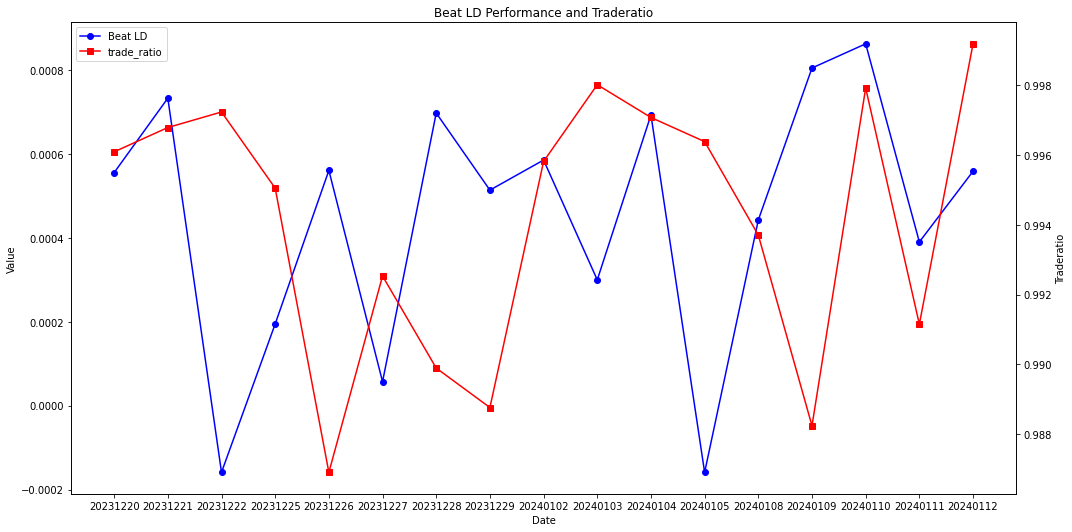

In [70]:
import matplotlib.pyplot as plt

# 设置图形尺寸
plt.figure(figsize=(15, 7.5))

# 创建第一个坐标轴
ax1 = plt.gca()

# 绘制数据列1
ax1.plot(dates_all, beat_ld, linestyle='-', marker='o', color='blue', label='Beat LD')

# 添加标题和轴标签
plt.title('Beat LD Performance and Traderatio')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')

# 创建第二个坐标轴
ax2 = ax1.twinx()

# 绘制数据列2
ax2.plot(dates_all, trade_ratio, linestyle='-', marker='s', color='red', label='trade_ratio')

# 添加第二个坐标轴的轴标签
ax2.set_ylabel('Traderatio')

# 合并图例
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

# 调整 x 轴标签
plt.xticks(rotation=45)
plt.tight_layout()

# 显示图形
plt.show()

In [86]:
import numpy as np
import os
import json
score_path = "/scratch/share_test/exec_data/fanymodel/lgb_20240112_v4/backtest_res1/"
dd_list = os.listdir(score_path)
dd_list.sort()
beat_ld_fy = []
dates_all = []
order_amount_all = []
trade_amount_all = []
trade_ratio = []
# for dd in ["20231226.json"]:
for dd in dd_list:
    with open(score_path+dd,'r') as file:
        data = json.load(file)
    beat_ld_all = 0
    trade_amount = 0
    order_amount = 0
    for tt1 in data:
        order_amount+=tt1['pct10amount']*abs(tt1['original_volume'])
        if np.isnan(tt1['tradeprice']):
            continue
        beat_ld_all+=((tt1['pct10amount']*(1+np.sign(tt1['original_volume'])*0.0005))-tt1['tradeprice'])*tt1['original_volume']
        trade_amount+=tt1['pct10amount']*tt1['trade_volume']
    beat_ld_fy.append(beat_ld_all/trade_amount)
    dates_all.append(dd[:8])
    trade_ratio.append(trade_amount/order_amount)


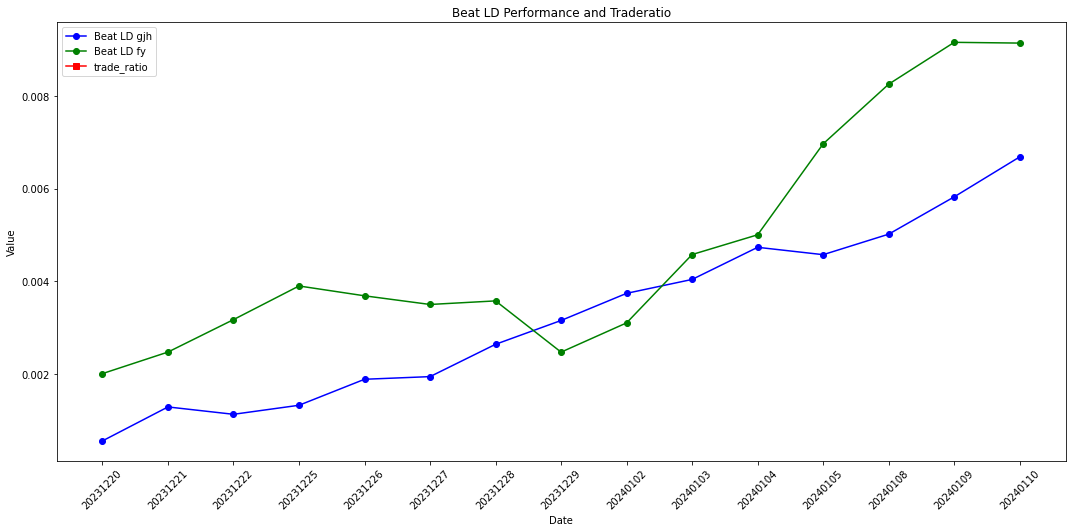

In [87]:
import matplotlib.pyplot as plt

# 设置图形尺寸
plt.figure(figsize=(15, 7.5))

# 创建第一个坐标轴
ax1 = plt.gca()

# 绘制数据列1
ax1.plot(dates_all, np.cumsum(beat_ld[:15]), linestyle='-', marker='o', color='blue', label='Beat LD gjh')
ax1.plot(dates_all, np.cumsum(beat_ld_fy), linestyle='-', marker='o', color='green', label='Beat LD fy')

# 添加标题和轴标签
plt.title('Beat LD Performance and Traderatio')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')

# # 创建第二个坐标轴
# ax2 = ax1.twinx()

# # 绘制数据列2
# ax2.plot(dates_all, trade_ratio, linestyle='-', marker='s', color='red', label='trade_ratio')

# # 添加第二个坐标轴的轴标签
# ax2.set_ylabel('Traderatio')

# 合并图例
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

# 调整 x 轴标签
plt.xticks(rotation=45)
plt.tight_layout()

# 显示图形
plt.show()

看pred的分布

In [45]:
import matplotlib.pyplot as plt
import os
import numpy as np
score_path = "/scratch/share_test/exec_data/fanymodel/lgb_20240112_v4/pred/"
dates_all =  list(os.listdir(score_path))
import pandas as pd
label_all = []
score_all = []
dates_all.sort()
for date in dates_all[:5]:
    pred_score_date = np.load(score_path+f'{date}')[0]
    pred_tmp = np.nanmean(pred_score_date.T[:,[1,3]],axis = 1)
    label = np.load(f'/scratch/share_test/exec_data/train_base/label/test/{date[-12:-4]}.npy')[:,3]
    for j in [1]:
        nanmask = (~np.isnan(pred_tmp))&(~np.isnan(label))
        print(date,f'label{j}',np.corrcoef(pred_tmp[nanmask],label[nanmask])[0,1])
    label_all.append(label[nanmask])
    score_all.append(pred_tmp[nanmask])
label_all = np.hstack(label_all).reshape(-1)
score_all = np.hstack(score_all).reshape(-1)


score_20231201.npy label1 0.08993094444339393
score_20231204.npy label1 0.07671374600187224
score_20231205.npy label1 0.11819545429300593
score_20231206.npy label1 0.06605561162405796
score_20231207.npy label1 0.09191898887181207


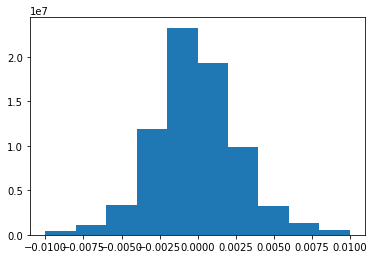

In [46]:

import matplotlib.pyplot as plt
zero_mask = label_all!=0
plt.hist(label_all[zero_mask],range=(-0.01,0.01))
# plt.hist(label[nanmask],range=(-0.01,0.01))
plt.show()


In [47]:

import numpy as np
from scipy.optimize import curve_fit
def cubic_func(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

# 拟合数据
params, _ = curve_fit(cubic_func, score_all[zero_mask], label_all[zero_mask])
# params, _ = curve_fit(cubic_func, score_all, label_all)

# 提取拟合参数
a, b, c, d = params
a, b, c, d

(0.04271790826343824,
 -0.06799268264392189,
 0.03887017578493013,
 -0.007869176317612192)

In [48]:
print('第99分位数的x值：',np.nanpercentile(pred_tmp[nanmask],99),'对应的pred ret： ',cubic_func(np.nanpercentile(pred_tmp[nanmask],99),a,b,c,d))
print('第90分位数的x值：',np.nanpercentile(pred_tmp[nanmask],90),'对应的pred ret： ',cubic_func(np.nanpercentile(pred_tmp[nanmask],90),a,b,c,d))
print('第85分位数的x值：',np.nanpercentile(pred_tmp[nanmask],75),'对应的pred ret： ',cubic_func(np.nanpercentile(pred_tmp[nanmask],85),a,b,c,d))
print('第50分位数的x值：',np.nanpercentile(pred_tmp[nanmask],50),'对应的pred ret： ',cubic_func(np.nanpercentile(pred_tmp[nanmask],50),a,b,c,d))
print('第15分位数的x值：',np.nanpercentile(pred_tmp[nanmask],25),'对应的pred ret： ',cubic_func(np.nanpercentile(pred_tmp[nanmask],15),a,b,c,d))
print('第10分位数的x值：',np.nanpercentile(pred_tmp[nanmask],10),'对应的pred ret： ',cubic_func(np.nanpercentile(pred_tmp[nanmask],10),a,b,c,d))
print('第1分位数的x值：',np.nanpercentile(pred_tmp[nanmask],1),'对应的pred ret： ',cubic_func(np.nanpercentile(pred_tmp[nanmask],1),a,b,c,d))

第99分位数的x值： 0.8274724912643432 对应的pred ret：  0.0019425879954416275
第90分位数的x值： 0.6718914031982424 对应的pred ret：  0.0005099587767658197
第85分位数的x值： 0.5983736515045166 对应的pred ret：  0.00035992018269508097
第50分位数的x值： 0.5250956416130066 对应的pred ret：  -2.1134553090315644e-05
第15分位数的x值： 0.4559929072856903 对应的pred ret：  -0.00037823650105958673
第10分位数的x值： 0.39282160997390747 对应的pred ret：  -0.0005026199188082996
第1分位数的x值： 0.19343738079071046 对应的pred ret：  -0.002585188808740861


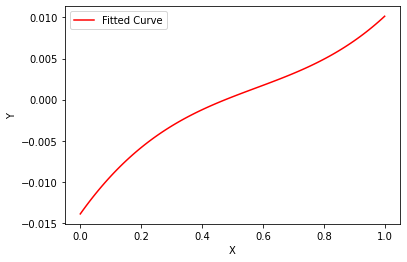

In [5]:
import matplotlib.pyplot as plt
# 生成拟合曲线

# 绘制原始数据和拟合曲线

# 生成拟合曲线
X_fit = np.linspace(0, 1, 100)
Y_fit = cubic_func(X_fit, a, b, c, d)
# 绘制原始数据和拟合曲线
plt.plot(X_fit, Y_fit, color='red', label='Fitted Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [15]:
path = "/scratch/wy_dev/ML/share_datatools/data/T0/snap_allday/infos/updatetime"
timestamp = np.load(path+'/20240108.npy')
type(timestamp[0])

numpy.float64

(array([4.520000e+02, 5.110000e+02, 6.040000e+02, 7.710000e+02,
        5.590000e+02, 6.110000e+02, 7.330000e+02, 8.130000e+02,
        9.250000e+02, 9.070000e+02, 1.102000e+03, 1.017000e+03,
        1.181000e+03, 1.195000e+03, 1.408000e+03, 1.580000e+03,
        1.722000e+03, 1.863000e+03, 2.436000e+03, 2.594000e+03,
        2.809000e+03, 3.390000e+03, 3.609000e+03, 3.970000e+03,
        4.808000e+03, 5.132000e+03, 6.017000e+03, 5.903000e+03,
        6.892000e+03, 8.318000e+03, 1.000100e+04, 1.205500e+04,
        1.493400e+04, 1.838500e+04, 2.308100e+04, 2.924500e+04,
        3.631100e+04, 4.627000e+04, 6.027100e+04, 8.378400e+04,
        1.210070e+05, 1.672460e+05, 2.484240e+05, 3.715320e+05,
        5.395860e+05, 8.154400e+05, 1.260411e+06, 1.686944e+06,
        2.002285e+06, 1.853992e+06, 2.017081e+06, 1.959852e+06,
        1.470656e+06, 1.092882e+06, 7.778300e+05, 5.651480e+05,
        4.088490e+05, 3.211840e+05, 2.856160e+05, 2.442100e+05,
        2.073990e+05, 1.911500e+05, 1.93

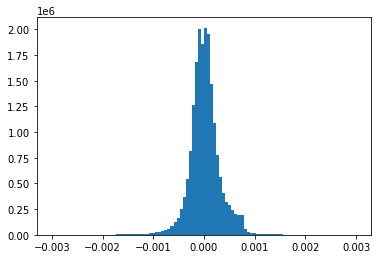

In [11]:
import numpy as np
path = '/scratch/wy_dev/ML/share_datatools/data/T0/snap_allday/score/theo_midret/'
a = np.load(path+'20240111.npy')
import matplotlib.pyplot as plt
plt.hist(a[:,1],bins = 100,range=(-0.003,0.003))

In [16]:
print(np.nanpercentile(a[:,4],85))
print(np.nanpercentile(a[:,4],15))

0.0002925332519225776
-0.0003506001376081258


In [7]:
updatetime_path = "/scratch/wy_dev/ML/share_datatools/data/T0/snap_allday/infos/updatetime/"
localtime_path = "/scratch/wy_dev/ML/share_datatools/data/T0/snap_allday/infos/localtime/"
updatetime = np.load(updatetime_path+'20231221.npy')
localtime = np.load(localtime_path+'20231221.npy')

In [12]:
updatetime

array([ 93000.,  93003.,  93006., ..., 145452., 145455., 145458.])

In [11]:
localtime

array([ 93000.286,  93003.146,  93006.146, ..., 145452.072, 145455.149,
       145458.068])

In [15]:
import pandas as pd
pd.DataFrame(localtime-updatetime).describe()

,0
count,1.949463e+07
mean,7.107379e-01
std,4.516657e+00
min,3.000000e-03
25%,3.510000e-01
50%,6.130000e-01
75%,1.003000e+00
max,4.041010e+03
